In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.append('..')

from stattests.tests import *
from stattests.generation import generate_data
from stattests.utils import plot_cdf, plot_summary, codenames2titles,  frame_from_params, plot_from_params, save_gif_and_show
from stattests.data import rpv, apply_all_tests
from tqdm import tqdm

import seaborn as sns
sns.set_style("whitegrid")

In [2]:
codenames2titles.keys()

dict_keys(['ttest_successes_count', 'mannwhitney_successes_count', 'delta', 'bootstrap', 'linearization', 'buckets_ctrs', 't_test_ctrs', 'weighted_bootstrap', 'weighted_linearization', 'weighted_buckets', 'weighted_t_test_ctrs', 'weighted_sqr_bootstrap', 'weighted_sqr_linearization', 'weighted_sqr_buckets', 'weighted_sqr_t_test_ctrs', 'ttest_smoothed'])

In [3]:
success_rate = 0.02
uplift = 0.2
N = 5000
NN = 2000

beta = 1000
skew = 1

In [4]:
skew_params = []
for s in np.linspace(0.1, 4, 20):
    skew_params.append({'success_rate': success_rate, 'uplift': uplift, 'beta': beta, 'skew': s, 'N': N, 'NN': NN})

In [5]:
beta_params = []
for b in np.logspace(0, 3, 20)[::-1]:
    beta_params.append({'success_rate': success_rate, 'uplift': uplift, 'beta': b, 'skew': skew, 'N': N, 'NN': NN})

In [6]:
sr_params = []
for sr in np.logspace(-3, -0.3, 20):
    sr_params.append({'success_rate': sr, 'uplift': uplift, 'beta': 500, 'skew': skew, 'N': N, 'NN': NN})

# Генерируем данные

In [36]:
for param in tqdm(beta_params + skew_params + sr_params):
    apply_all_tests('../data', **param)


100%|██████████| 60/60 [10:45<00:00, 10.76s/it]


# Картиночки

In [8]:
figsize = (4, 3)
dpi = 200

Text(0, 0.5, 'Sensitivity')

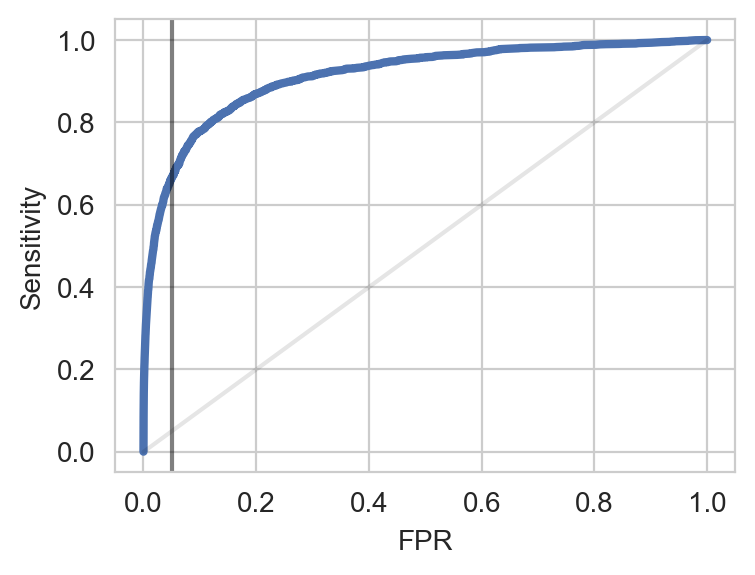

In [9]:
fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
ab_data, aa_data = rpv('../data', 'mannwhitney_successes_count', N=N, NN=NN, uplift=uplift, beta=beta, success_rate=success_rate, skew=0.1)
plot_cdf(ab_data, 'MW', ax)
ax.plot(np.linspace(0, 1, 10000), np.linspace(0, 1, 10000), 'k', alpha=0.1)
ax.axvline(0.05, color='k', alpha=0.5)
ax.set_xlabel('FPR')
ax.set_ylabel('Sensitivity')

Text(0.5, 1.0, 'Views distribution')

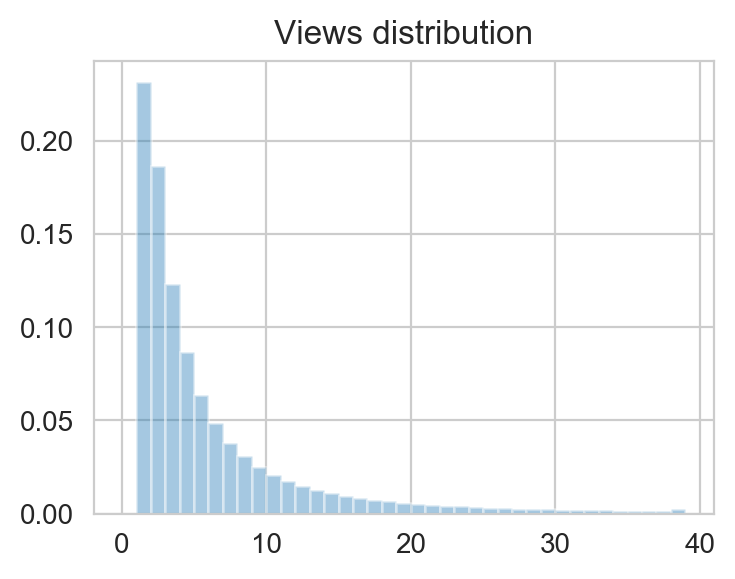

In [10]:
fig, ax = plt.subplots(figsize=figsize, dpi=dpi)

(views_0_ab, clicks_0_ab), _, gt_success_rates = generate_data(**skew_params[6])
sns.distplot(views_0_ab.flatten(), bins=range(0, 40), ax=ax, kde=False, norm_hist=True)
ax.set_title('Views distribution')

Text(0.5, 1.0, 'Ground truth user CTR distribution')

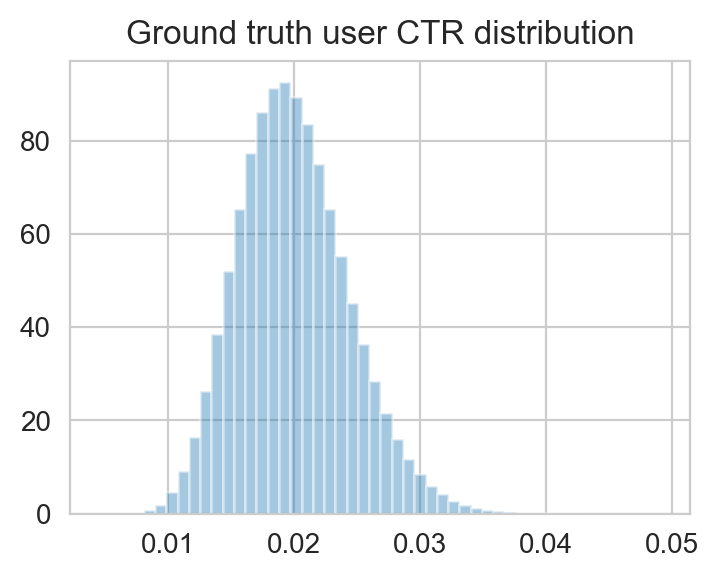

In [11]:
fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
sns.distplot(gt_success_rates.flatten(), ax=ax, kde=False, norm_hist=True)
ax.set_title('Ground truth user CTR distribution')

Text(0.5, 1.0, 'Clicks distribution')

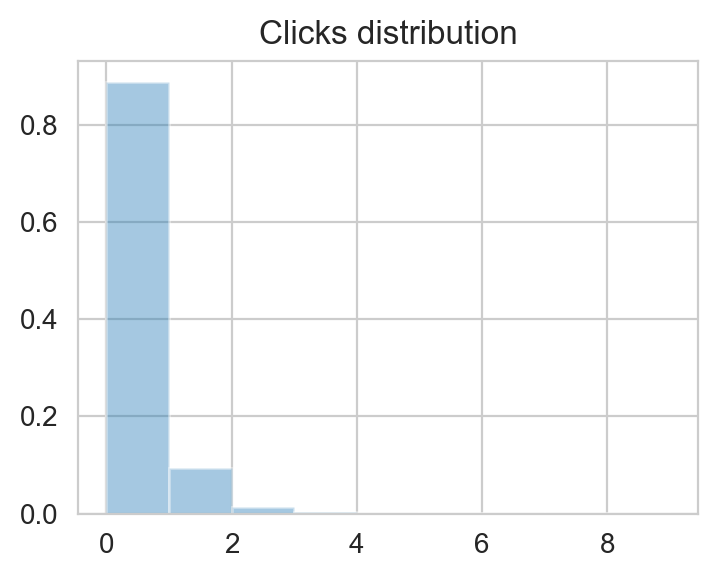

In [12]:
fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
sns.distplot(clicks_0_ab.flatten(), bins=range(0, 10), ax=ax, kde=False, norm_hist=True)
ax.set_title('Clicks distribution')

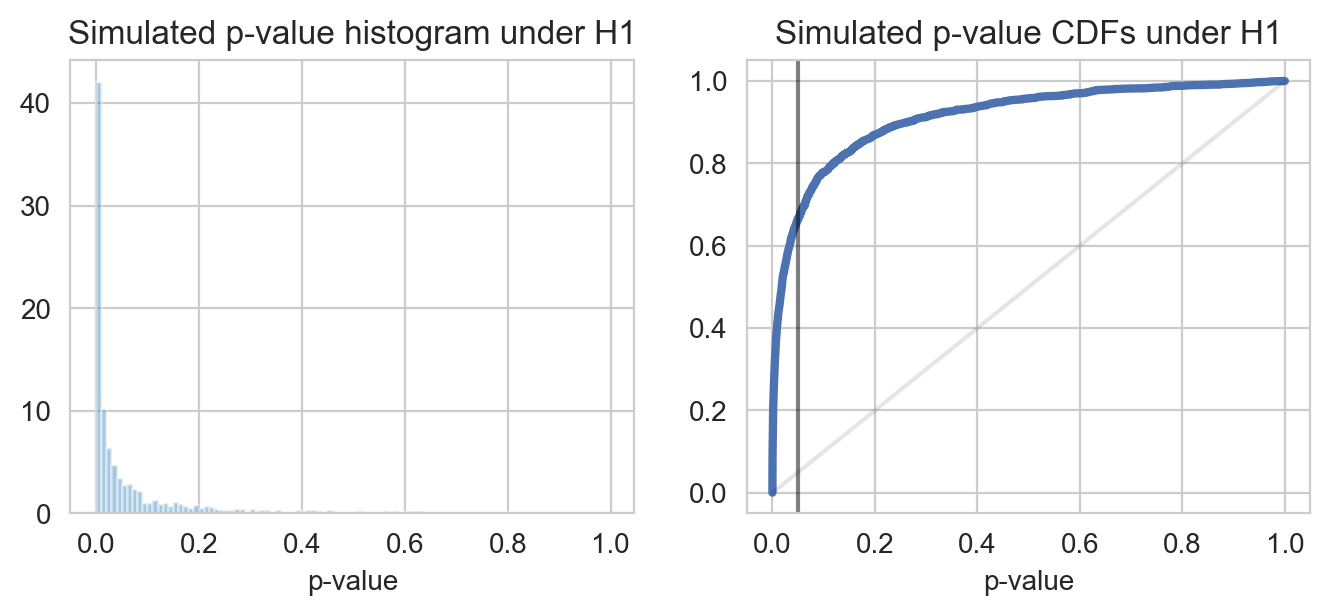

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(figsize[0] * 2, figsize[1]), dpi=dpi)
ab_data, aa_data = rpv('../data', 'mannwhitney_successes_count', N=N, NN=NN, uplift=uplift, beta=beta, success_rate=success_rate, skew=0.1)
plot_cdf(ab_data, 'MW', ax2)

ax2.plot(np.linspace(0, 1, 10000), np.linspace(0, 1, 10000), 'k', alpha=0.1)
ax2.axvline(0.05, color='k', alpha=0.5)
ax2.set_title('Simulated p-value CDFs under H1')
ax2.set_xlabel('p-value')

ax1.set_title('Simulated p-value histogram under H1')
ax1.set_xlabel('p-value')
sns.distplot(ab_data.flatten(), ax=ax1, bins=100, kde=False, norm_hist=True)


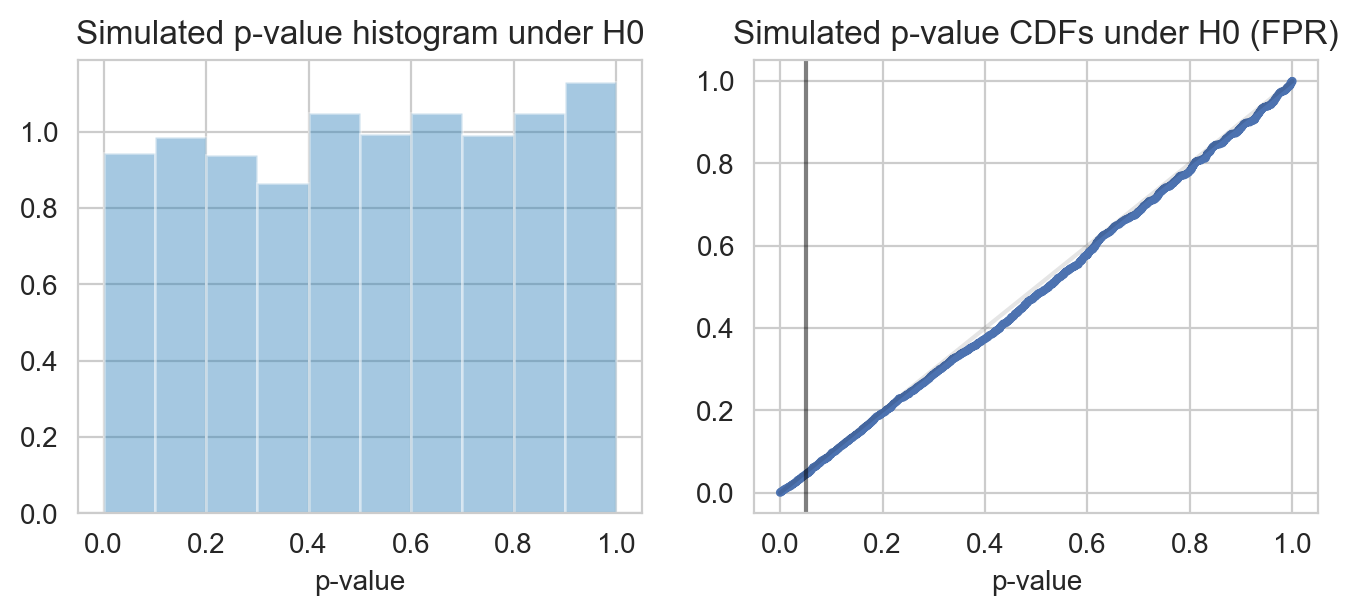

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(figsize[0] * 2, figsize[1]), dpi=dpi)

ab_data, aa_data = rpv('../data', 'mannwhitney_successes_count', N=N, NN=NN, uplift=uplift, beta=beta, success_rate=success_rate, skew=0.1)
plot_cdf(aa_data, 'MW', ax2)

ax2.plot(np.linspace(0, 1, 10000), np.linspace(0, 1, 10000), 'k', alpha=0.1)
ax2.axvline(0.05, color='k', alpha=0.5)
ax2.set_title('Simulated p-value CDFs under H0 (FPR)')
ax2.set_xlabel('p-value')

ax1.set_title('Simulated p-value histogram under H0')
ax1.set_xlabel('p-value')
sns.distplot(aa_data.flatten(), ax=ax1, bins=10, kde=False, norm_hist=True)

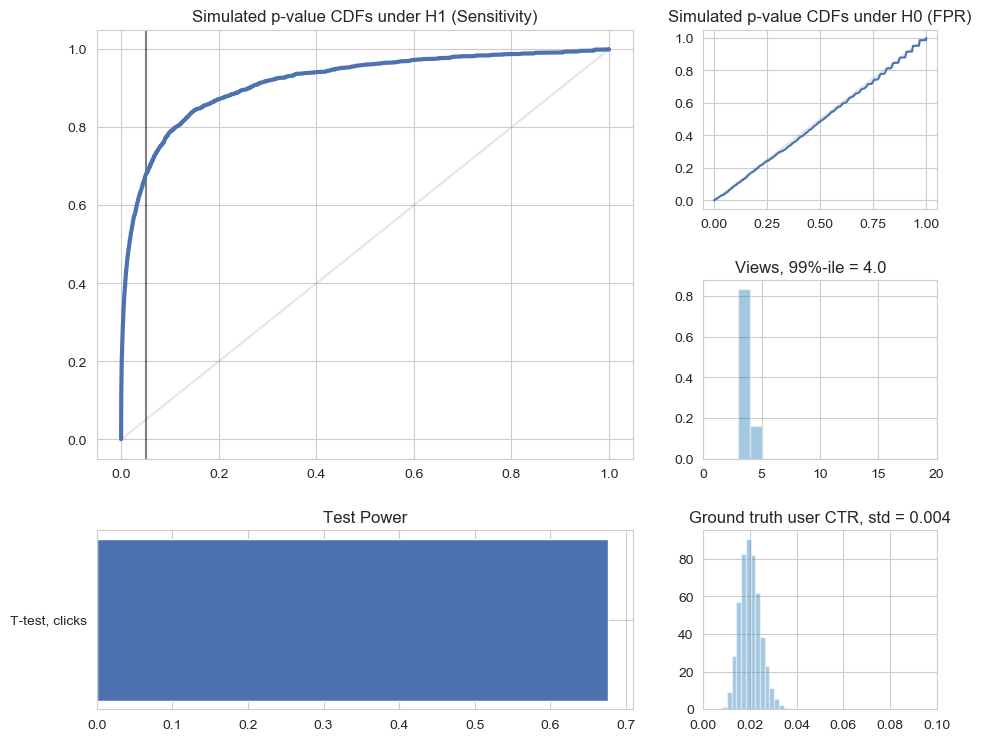

In [15]:
fig = plot_from_params('../data', skew_params[0], codenames=['ttest_successes_count'])

# Counts

#### T-test

In [16]:
frames = [frame_from_params('../data', p, codenames=['ttest_successes_count']) for p in skew_params]
save_gif_and_show('../gifs/powers_ttest.gif', frames)

#### MW

In [17]:
frames = [frame_from_params('../data', p, codenames=['ttest_successes_count', 'mannwhitney_successes_count']) for p in skew_params]
save_gif_and_show('../gifs/ttest_mw_powers.gif', frames)

In [18]:
frames = [frame_from_params('../data', p, codenames=['ttest_successes_count', 'mannwhitney_successes_count']) for p in beta_params]
save_gif_and_show('../gifs/ttest_mw_ctrs.gif', frames)

# CTRS

#### z-test

In [41]:
frames = [frame_from_params('../data', p, codenames=['binomial_test']) for p in beta_params]
save_gif_and_show('../gifs/binomial_test_ctrs.gif', frames)

#### Bootstrap CTR

In [20]:
frames = [frame_from_params('../data', p, codenames=['mannwhitney_successes_count', 'bootstrap']) for p in skew_params]
save_gif_and_show('../gifs/mw_bootstrap_powers.gif', frames)

In [21]:
frames = [frame_from_params('../data', p, codenames=['mannwhitney_successes_count', 'bootstrap']) for p in beta_params]
save_gif_and_show('../gifs/mw_bootstrap_ctrs.gif', frames)

#### Delta-method for global CTR

In [22]:
frames = [frame_from_params('../data', p, codenames=['mannwhitney_successes_count', 'bootstrap', 'delta']) for p in skew_params]
save_gif_and_show('../gifs/mw_bootstrap_delta_powers.gif', frames)

In [23]:
frames = [frame_from_params('../data', p, codenames=['mannwhitney_successes_count', 'bootstrap', 'delta']) for p in beta_params]
save_gif_and_show('../gifs/mw_bootstrap_delta_ctrs.gif', frames)

#### Bucketization

In [24]:
frames = [frame_from_params('../data', p, codenames=['mannwhitney_successes_count', 'bootstrap', 'delta', 'buckets_ctrs']) for p in skew_params]
save_gif_and_show('../gifs/mw_bootstrap_buckets_powers.gif', frames)

In [25]:
frames = [frame_from_params('../data', p, codenames=['mannwhitney_successes_count', 'bootstrap', 'delta', 'buckets_ctrs']) for p in beta_params]
save_gif_and_show('../gifs/mw_bootstrap_buckets_ctrs.gif', frames)

#### Linearization

In [26]:
frames = [frame_from_params('../data', p, codenames=['mannwhitney_successes_count', 'bootstrap', 'delta', 'buckets_ctrs', 'linearization']) for p in skew_params]
save_gif_and_show('../gifs/mw_bootstrap_linearization_powers.gif', frames)

In [27]:
frames = [frame_from_params('../data', p, codenames=['mannwhitney_successes_count', 'bootstrap', 'delta', 'buckets_ctrs', 'linearization']) for p in beta_params]
save_gif_and_show('../gifs/mw_bootstrap_linearization_ctrs.gif', frames)

#### T-test on CTRs

In [28]:
frames = [frame_from_params('../data', p, codenames=['mannwhitney_successes_count', 'bootstrap', 't_test_ctrs']) for p in skew_params]
save_gif_and_show('../gifs/mw_bootstrap_ttest_ctrs_powers.gif', frames)

In [29]:
frames = [frame_from_params('../data', p, codenames=['mannwhitney_successes_count', 'bootstrap', 't_test_ctrs']) for p in beta_params]
save_gif_and_show('../gifs/mw_bootstrap_ttest_ctrs_ctrs.gif', frames)

#### T-test on smoothed CTRs

In [30]:
frames = [frame_from_params('../data', p, codenames=['mannwhitney_successes_count', 'bootstrap', 'ttest_smoothed']) for p in skew_params]
save_gif_and_show('../gifs/mw_bootstrap_ttest_smoothed_powers.gif', frames)

In [31]:
frames = [frame_from_params('../data', p, codenames=['mannwhitney_successes_count', 'bootstrap', 'ttest_smoothed']) for p in beta_params]
save_gif_and_show('../gifs/mw_bootstrap_ttest_smoothed_ctrs.gif', frames)

# Intra-user correlation aware

In [32]:
frames = [frame_from_params('../data', p, codenames=['bootstrap', 'weighted_bootstrap', 'mannwhitney_successes_count', 'ttest_smoothed']) for p in skew_params]
save_gif_and_show('../gifs/ebay_weights_powers.gif', frames)

In [33]:
frames = [frame_from_params('../data', p, codenames=['bootstrap', 'weighted_bootstrap', 'mannwhitney_successes_count', 'ttest_smoothed']) for p in beta_params]
save_gif_and_show('../gifs/ebay_weights_ctrs.gif', frames)

# Something

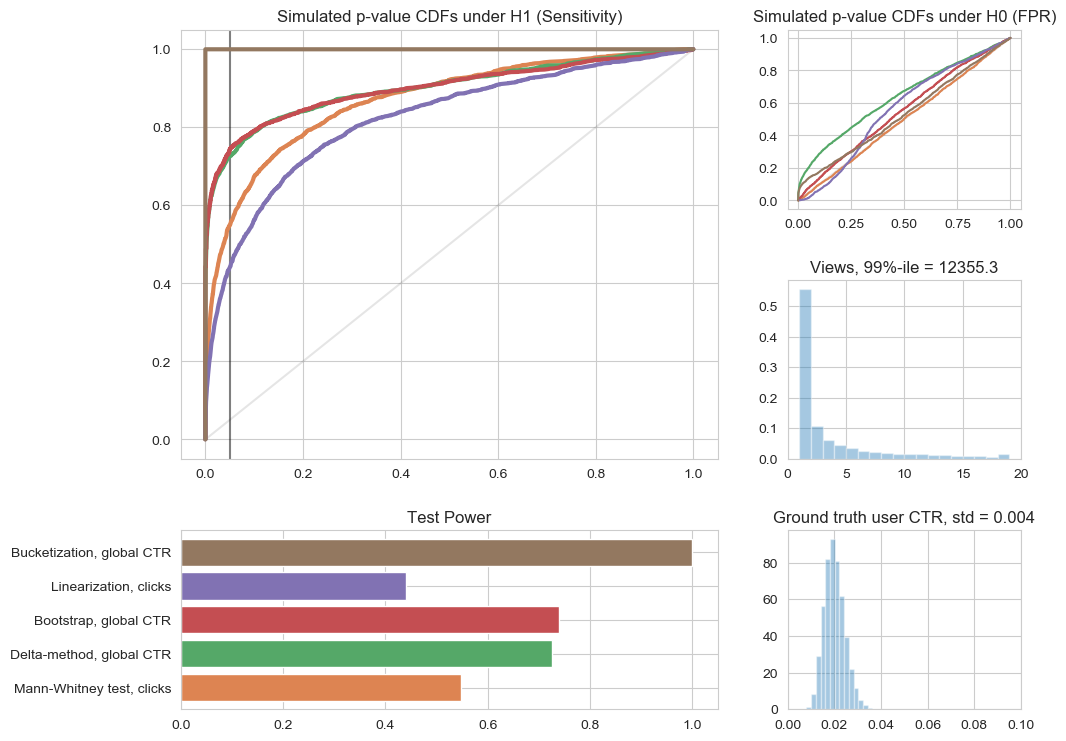

In [34]:
fig = plot_from_params('../data', skew_params[17], codenames=['mannwhitney_successes_count', 'bootstrap', 'delta', 'buckets_ctrs', 'linearization'])